In [27]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
X, y = load_iris(return_X_y=True)
#去中心化
X = X - X.mean(axis=0)
#就算样本矩阵的协方差矩阵
C = np.cov(X,rowvar = False)
eigen_vals , eigen_vecs = np.linalg.eig(C)
print("特征值:\n",eigen_vals)
print("特征向量:\n", eigen_vecs)

特征值:
 [4.22824171 0.24267075 0.0782095  0.02383509]
特征向量:
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [29]:
#后两个维度的特征值很小，也就是方差（包含的信息）很小，所以我们只
#保留前两个维度。
W = eigen_vecs[:,0:2]
T= np.dot(X,W)
print(T[:10])

[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]]


In [17]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
T2 = pca.fit_transform(X)
print(T2[: 10])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


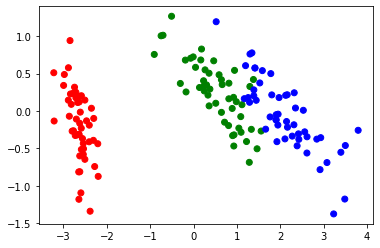

In [19]:
color = np.array(["r","g","b"])
plt.scatter(T[:,0],T[:,1],c=color[y])

In [21]:
## 用python实现主成分分析（PCA）
import numpy as np
from numpy.linalg import eig
from sklearn.datasets import load_iris
def pca(X,k):
    X = X - X.mean(axis = 0) #向量X去中心化
    X_cov = np.cov(X.T, ddof = 0) #计算向量X的协方差矩阵，自由度可以选择0或1
    eigenvalues,eigenvectors = eig(X_cov) #计算协方差矩阵的特征值和特征向量
    klarge_index = eigenvalues.argsort()[-k:][::-1] #选取最大的K个特征值及其特征向量
    k_eigenvectors = eigenvectors[klarge_index] #用X与特征向量相乘
    return np.dot(X, k_eigenvectors.T)
iris = load_iris()
X = iris.data
k = 2
X_pca = pca(X, k)
print(X_pca)

[[ 4.97868859e-01 -1.35075351e+00]
 [ 7.53885926e-01 -9.68768289e-01]
 [ 6.08493838e-01 -1.15768716e+00]
 [ 5.21608086e-01 -9.56636595e-01]
 [ 3.96071322e-01 -1.41531740e+00]
 [ 2.32137811e-01 -1.55274621e+00]
 [ 4.14383159e-01 -1.26744842e+00]
 [ 4.69186091e-01 -1.20949403e+00]
 [ 6.38851507e-01 -8.53490888e-01]
 [ 5.98475344e-01 -9.50021039e-01]
 [ 4.16764097e-01 -1.46235147e+00]
 [ 3.38705788e-01 -1.13279845e+00]
 [ 6.86198547e-01 -9.28343727e-01]
 [ 6.80114207e-01 -1.06545572e+00]
 [ 5.38951057e-01 -1.89458215e+00]
 [ 1.28665373e-01 -2.06276585e+00]
 [ 4.64949751e-01 -1.79191054e+00]
 [ 5.29417578e-01 -1.38272582e+00]
 [ 3.74663946e-01 -1.47311451e+00]
 [ 2.74237961e-01 -1.54198317e+00]
 [ 4.97334758e-01 -1.12372087e+00]
 [ 3.71445558e-01 -1.50093933e+00]
 [ 4.84328626e-01 -1.62067273e+00]
 [ 5.49223815e-01 -1.12126490e+00]
 [ 1.64096833e-01 -9.53425196e-01]
 [ 6.73618615e-01 -8.57638374e-01]
 [ 4.74080545e-01 -1.21364757e+00]
 [ 4.75804533e-01 -1.29941468e+00]
 [ 5.99666395e-01 -1

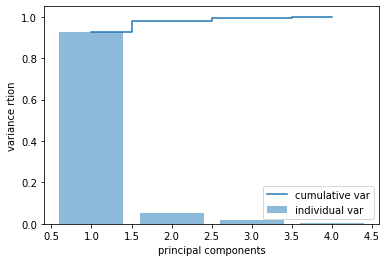

In [22]:
## An highlighted block
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from numpy.linalg import eig
#matplotlib inline

iris = load_iris()
X = iris.data
X = X - X.mean(axis = 0)

#计算协方差矩阵
X_cov = np.cov(X.T, ddof = 0)

#计算协方差矩阵的特征值和特征向量
eigenvalues,eigenvectors = eig(X_cov)

tot = sum(eigenvalues)
var_exp = [(i/tot) for i in sorted(eigenvalues, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,5), var_exp, alpha = 0.5, align = 'center', label = 'individual var')
plt.step(range(1,5), cum_var_exp, where = 'mid', label = 'cumulative var')
plt.ylabel('variance rtion')
plt.xlabel('principal components')
plt.legend(loc = 'best')
plt.show()

In [24]:
import numpy as np

# 输入待降维数据 (5 * 6) 矩阵，6个维度，5个样本值
A = np.array([[84,65,61,72,79,81],[64,77,77,76,55,70],[65,67,63,49,57,67],[74,80,69,75,63,74],[84,74,70,80,74,82]])
print(type(A))
print(A)
# 对每一个属性的样本求均值
MEAN = np.mean(A, axis=0) # 沿轴0调用mean函数
print(MEAN)

# 去中心化
X = np.subtract(A, MEAN)
print(X)
print(X.T) #矩阵的转置
# 计算协方差矩阵
COV = np.dot(X.T, X)
print(COV)
# 计算特征值和特征向量
W, V = np.linalg.eig(COV)
print(W) # 特征值
print(V) # 特征向量
# 计算主成分贡献率以及累计贡献率
sum_lambda = np.sum(W) # 特征值的和
print(sum_lambda)

f = np.divide(W, sum_lambda) # 每个特征值的贡献率（特征值 / 总和）
print(f)
f[0]+f[1] # 前两大的特征值的累计贡献率
f[0]+f[1]+f[2] # 前三大的特征值的累计贡献率
# 0.97 > 0.85，只需要选取前两大特征值即可，以从6维降到2维
# 前两大特征值对应的特征向量为：
e1 = V.T[0]
print(e1)
e2 = V.T[1]
print(e2)

# 计算主成分值（已去中心化）
z1 = np.dot(X, e1)
print(z1)
z2 = np.dot(X, e2)
print(z2)
# 输出降维后的结果（已去中心化）
RES = np.array([z1,z2])
print(RES)
print(RES.T)

<class 'numpy.ndarray'>
[[84 65 61 72 79 81]
 [64 77 77 76 55 70]
 [65 67 63 49 57 67]
 [74 80 69 75 63 74]
 [84 74 70 80 74 82]]
[74.2 72.6 68.  70.4 65.6 74.8]
[[  9.8  -7.6  -7.    1.6  13.4   6.2]
 [-10.2   4.4   9.    5.6 -10.6  -4.8]
 [ -9.2  -5.6  -5.  -21.4  -8.6  -7.8]
 [ -0.2   7.4   1.    4.6  -2.6  -0.8]
 [  9.8   1.4   2.    9.6   8.4   7.2]]
[[  9.8 -10.2  -9.2  -0.2   9.8]
 [ -7.6   4.4  -5.6   7.4   1.4]
 [ -7.    9.   -5.    1.    2. ]
 [  1.6   5.6 -21.4   4.6   9.6]
 [ 13.4 -10.6  -8.6  -2.6   8.4]
 [  6.2  -4.8  -7.8  -0.8   7.2]]
[[ 380.8  -55.6  -95.   248.6  401.4  252.2]
 [ -55.6  165.2  131.   179.8 -107.8  -20.4]
 [ -95.   131.   160.   170.  -132.   -34. ]
 [ 248.6  179.8  170.   605.2  214.8  215.4]
 [ 401.4 -107.8 -132.   214.8  443.2  263.6]
 [ 252.2  -20.4  -34.   215.4  263.6  174.8]]
[1.22517276e+03 6.54041238e+02 3.95721181e+01 1.04138814e+01
 1.66120391e-13 5.06818209e-14]
[[-0.53264253  0.20279107 -0.34433806  0.39437042  0.62853069  0.00976321]
 [ 0

In [2]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA

[2.37926428 4.51893279 2.46243718 2.14811205 2.45864862 4.4451679
 2.57803469 5.90547609 3.6971748  4.41317671 4.29578306 4.19562559
 3.79316616 4.33477349 2.22467456 5.51543665 4.51989507 2.71227968
 5.74876123 4.28523548 5.76902638 3.29874845 5.41150606 3.6935969
 2.08904038 3.13822292 4.84402142 4.95109089 2.79687366 3.67140775
 3.74718241 5.23908088 2.45379128 4.40403632 3.02982513 4.90828118
 2.09683896 5.07292818 1.23933827 3.96783122 4.54279018 2.82694753
 2.47438735 4.58775171 2.05001833 3.89802507 0.62093235 2.33586541
 3.38471318 5.04262323]


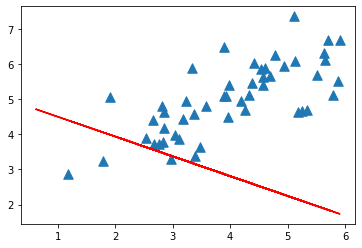

In [3]:
data1=loadmat('data1.mat')
data2=loadmat('data2.mat')
dataMat = data1['X']
dataMat2 = data2['X']
model = PCA(n_components=1)
newdata1 = model.fit_transform(dataMat)
newdata2 = model.fit_transform(dataMat2)
invX = model.inverse_transform(newdata1)
invX2 = model.inverse_transform(newdata2)
# print(invX)
print(invX[:,0])
plt.scatter(dataMat[:,0], dataMat[:,1], marker='^',s=90)
plt.plot(invX[:,0],invX[:,1],c='r')
plt.show()

In [4]:
def pca(dataMat, topNfeat = 9999999):
    meanVals = mean(dataMat, axis = 0)  #计算数据平均值
    meanRemoved = dataMat - meanVals    #去中心化
    covMat = cov(meanRemoved, rowvar = 0 ) #计算协方差
    #补充下面代码，按照注释的思路完成PCA的计算
    eigenvalues,eigenvectors=np.linalg.eig(covMat)  #计算协方差矩阵的特征值和特征向量
    eigenvaluessort_index=np.argsort(eigenvalues)   #对特征值从小到大排序，并提取对应的index   
    topk_eigenvectors=eigenvectors[:,eigenvaluessort_index[:-topNfeat-1:-1]]#对特征排序结果逆序，并保留topNfeat的index,根据特征值排序结果得到topNfeat个最大的特征向量
    #print(topk_eigenvectors)
    lowDataMat=np.dot(meanRemoved,topk_eigenvectors)    #数据降维
    #print(lowDataMat)
#     print(meanRemoved)
#     print(topk_eigenvectors)
    lowDataMat=np.dot(lowDataMat,topk_eigenvectors.T) 
    reconMat=lowDataMat+meanVals                      #降维后的数据重构（对比上面的计算公式，注意前面有去中心化操作，需要恢复）
    return lowDataMat, reconMat
def drawDataSet(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:,0], dataMat[:,1], marker='^',s=90)
    plt.plot(reconMat[:,0],reconMat[:,1],c='r')
    plt.show()

降维后的矩阵形状：
 (300, 2)


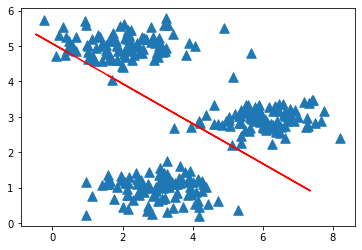

In [5]:
lowDMat, reconMat = pca(dataMat2,1)
print("降维后的矩阵形状：\n",shape(lowDMat))
drawDataSet(dataMat2, reconMat)

In [ ]:
# def pca(data,k):
#     #计算数据平均值
#     meanData = mean(data,axis = 0)
# #     print(meanData)
#     #去中心化
#     MEAN = data - meanData
# #     print(MEAN)
#     #计算协方差
#     covData = cov(MEAN, rowvar = 0 )
# #     print(covData)
#     #计算协方差矩阵的特征值和特征向量
#     eigenvalues,eigenvectors=np.linalg.eig(covData)
#     #对特征值进行从小到大排序，并得到对应的索引 
#     eigenvaluessort_index=np.argsort(eigenvalues)
#     #对特征排序结果逆序，并保留topNfeat的index,根据特征值排序结果得到topNfeat个最大的特征向量
#     k_eigenvectors=eigenvectors[:,eigenvaluessort_index[:-k-1:-1]]
# #     print(k_eigenvectors)
#     #数据降维
#     downData=np.dot(MEAN,k_eigenvectors)
# #     print(downData)
#     # 降维后的数据恢复
#     downData=np.dot(downData,k_eigenvectors.T) 
#     reData=downData+MEAN
#     return downData, reData
# #可视化
# def drawData(data, reData):
#     plt.scatter(data[:,0], data[:,1], marker='o',s=90)
#     plt.plot(reData[:,0],reData[:,1],c='r')
#     plt.show()

In [ ]:
# lowDMat1, reconMat1 = pca1(data1,1)
# # print(reconMat1)
# print("降维后的矩阵形状：\n",shape(lowDMat1))
# drawData(data1, reconMat1)